<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Mathematical_Theory_of_Optimization/blob/main/Multivariate_optimization_using_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dependencies

We will use symbolic differenetiation from SymPy library to reinforce theory knowledge. For future labs, SymPy will not be used this extensively.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Getting started with SymPy

SymPy is the symbolic math library in Python. It can be used to define expressions, equations and find the symbolic solutions for them. We will mainly use SymPy today to find the derivative of functions. For this course we will not need much of SymPy.

### Defining a function

Lets start by defining this specific function -

$f(x) = x^4 - 3\cdot x^4 + 2\cdot x^3 - x + 2$

In [ ]:
x = sp.symbols('x')
cost_function = x**7 - 3*x**4 + 2*x**3 - x + 2

To visualize the symbolic function, just run the variable (`cost_function` in this case) -

In [ ]:
cost_function

x**7 - 3*x**4 + 2*x**3 - x + 2

Unfortunately printing SymPy functions don't have the same effect.

In [ ]:
print(cost_function)

x**7 - 3*x**4 + 2*x**3 - x + 2


### Taking derivative

In [ ]:
first_derivative = sp.diff(cost_function, x)
first_derivative

7*x**6 - 12*x**3 + 6*x**2 - 1

For second derivative, you can take derivative of the first derivative -

In [ ]:
second_derivative = sp.diff(first_derivative, x)
second_derivative

42*x**5 - 36*x**2 + 12*x

Or you can also directly pass the derivative order in `sp.diff()`.

In [ ]:
second_derivative = sp.diff(cost_function, x, 2)
second_derivative

6*x*(7*x**4 - 6*x + 2)

It didn't return the exact similar form, but the expression, nonetheless, is the same. We can still expand the expression to reach the same result -

In [ ]:
sp.expand(second_derivative)

42*x**5 - 36*x**2 + 12*x

### Evaluating an expression and plotting

To evaluate a SymPy expression at a point, you can use the `.subs()` function. You can directly get the value by -

`func.subs(var, var_value)`

In [ ]:
cost_function.subs(x, 1.5)

9.14843750000000

The `.subs()` function doesn't directly accept a list or array as input. So one way to evaluate the function for multiple values is by iterating over the list -

In [ ]:
x_test = np.linspace(-2, 2, 10000)

In [ ]:
eval_vals = [cost_function.subs(x, test_val) for test_val in x_test]

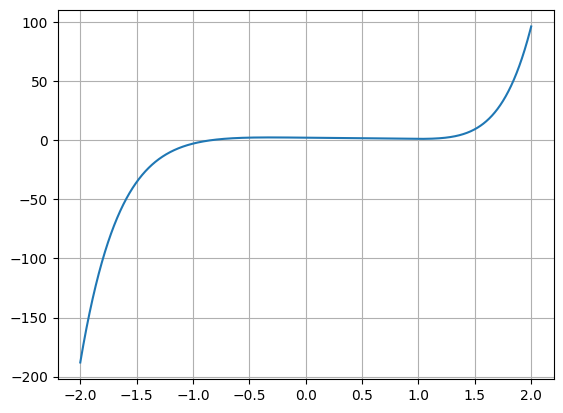

In [ ]:
plt.plot(x_test, eval_vals)
plt.grid('on')
plt.show();

But this is slow. Instead it is better to `lambdify()` the SymPy expression so that you can directly evaluate the expression for NumPy values -

In [ ]:
f = sp.lambdify(x, cost_function)

In [ ]:
x_test = np.linspace(-2, 2, 10000)

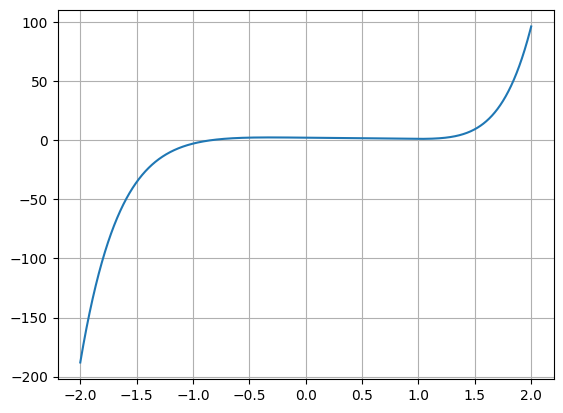

In [ ]:
plt.plot(x_test, f(x_test))
plt.grid('on')
plt.show();

You can directly take the help of SymPy, `sp.plot()` function. It automatically selects points to ensure a smooth curve.

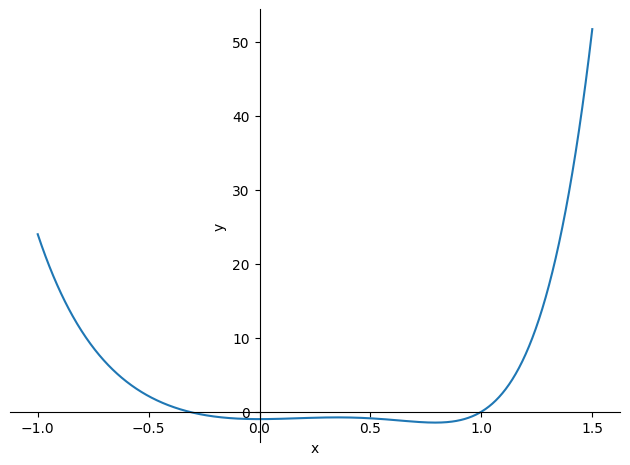

In [ ]:
sp.plot(first_derivative, (x, -1, 1.5), xlabel='x', ylabel='y');

### Defining a multivariable function

Lets define a multivariable function -
$f(x,y,z) = x^3 - 3\cdot y^2 + 2\cdot x\cdot z^2$

In [ ]:
x, y, z = sp.symbols('x y z')
cost_function = x**3 - 3*y**2 + 2*x*z**2

In [ ]:
cost_function

x**3 + 2*x*z**2 - 3*y**2

### Taking partial derivative of the function

In [ ]:
first_derivative_x = sp.diff(cost_function, x)
first_derivative_x

3*x**2 + 2*z**2

In [ ]:
first_derivative_y = sp.diff(cost_function, y)
first_derivative_y

-6*y

In [ ]:
first_derivative_z = sp.diff(cost_function, z)
first_derivative_z

4*x*z

### Gradient of a multivariable function

Gradient of a multivariable function is defined as -

$\nabla f(\bar{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}\\
\end{bmatrix}$, where $\bar{x}$ is a $n$-dimensional vector.

Since we already know how to derive the partial derivatives, lets code up a function to find out the gradient vector.

In [ ]:
def gradient(function, variables):
    grad = sp.Matrix([sp.diff(function, var) for var in variables])
    return grad

In [ ]:
gradient(cost_function, [x,y,z])

Matrix([
[3*x**2 + 2*z**2],
[           -6*y],
[          4*x*z]])

### Hessian of a multivariable function

Hessian of a multivariable function is the second-order partial derivative matrix of a multivariable function $f(\bar{x})$.

$H_f =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$

Now lets define a function to return the Hessian of a function.

In [ ]:
def hessian(function, variables):
    hess = sp.Matrix([[sp.diff(sp.diff(function, var2), var1) for var2 in variables] for var1 in variables])
    return hess

In [ ]:
hessian(cost_function, [x,y,z])

Matrix([
[6*x,  0, 4*z],
[  0, -6,   0],
[4*z,  0, 4*x]])

Now with the preliminaries set, lets move on to optimization.

# Univariate optimization

We know for univariate functions, at an optimal point ($x^*$), we have -

1. $f'(x^*) = 0$
2. $f''(x^*) > 0$ for minimas and $f''(x^*)<0$ for maximas.

Now lets test this for some random cost functions.

### Cost function 1



$f(x) = x^4  - x^2 + 2$

#### Define cost function

In [ ]:
x = sp.symbols('x')
cost_function = x**4 - x**2 + 2

#### Calculate the first derivative

In [ ]:
first_derivative = sp.diff(cost_function, x)

#### Find critical points


In [ ]:
critical_points = sp.solve(first_derivative, x)
print(critical_points)

[0, -sqrt(2)/2, sqrt(2)/2]


#### Perform second derivative test

In [ ]:
second_derivative = sp.diff(cost_function, x, 2)

for point in critical_points:
    second_derivative_value = second_derivative.subs(x, point)
    if second_derivative_value > 0:
        print(f"Critical point at x = {point} is a local minimum.")
    elif second_derivative_value < 0:
        print(f"Critical point at x = {point} is a local maximum.")
    else:
        print(f"Critical point at x = {point} is a saddle point (inconclusive test).")

Critical point at x = 0 is a local maximum.
Critical point at x = -sqrt(2)/2 is a local minimum.
Critical point at x = sqrt(2)/2 is a local minimum.


#### Graph validation

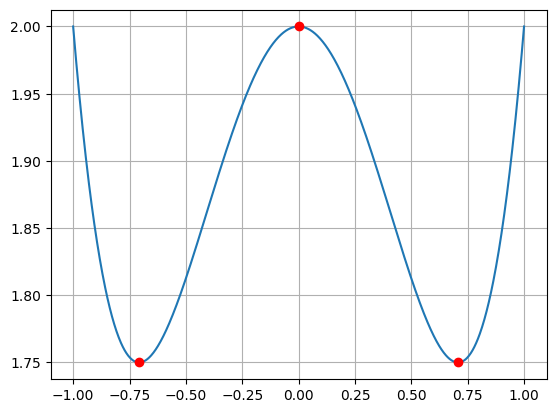

In [ ]:
f = sp.lambdify(x, cost_function)
x_test = np.linspace(-1, 1, 1000)
plt.plot(x_test, f(x_test), label='f(x)')

crit_coords = [(float(c), float(f(c))) for c in critical_points]
for x0, y0 in crit_coords:
    plt.plot(x0, y0, 'ro')  # red dots

plt.grid('on')
plt.show();

### Cost function 2

$f(x) = x^3$

In [ ]:
x = sp.symbols('x')
cost_function = x**3

In [ ]:
first_derivative = sp.diff(cost_function, x)

critical_points = sp.solve(first_derivative, x)
print(critical_points)

[0]


In [ ]:
second_derivative = sp.diff(cost_function, x, 2)

for point in critical_points:
    second_derivative_value = second_derivative.subs(x, point)
    if second_derivative_value > 0:
        print(f"Critical point at x = {point} is a local minimum.")
    elif second_derivative_value < 0:
        print(f"Critical point at x = {point} is a local maximum.")
    else:
        print(f"Critical point at x = {point} is a saddle point (inconclusive test).")

Critical point at x = 0 is a saddle point (inconclusive test).


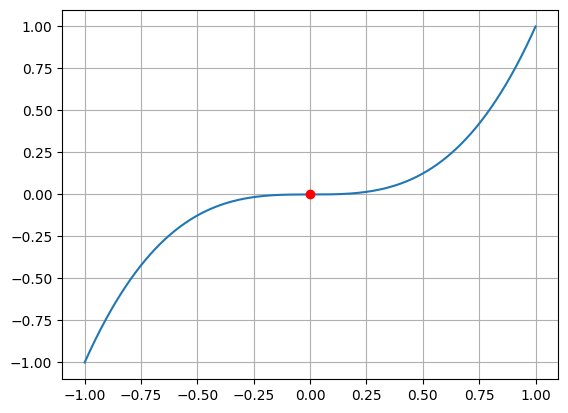

In [ ]:
f = sp.lambdify(x, cost_function)
x_test = np.linspace(-1, 1, 1000)
plt.plot(x_test, f(x_test), label='f(x)')

crit_coords = [(float(c), float(f(c))) for c in critical_points]
for x0, y0 in crit_coords:
    plt.plot(x0, y0, 'ro')  # red dots

plt.grid('on')
plt.show();

# Multivariate optimization

For multivariate functions, at an optimal point ($\bar{x}^*$), we have -

1. $\nabla f(\bar{x}^*) = \bar{0}$
2. $H_f(\bar{x}^*) \succ 0$ for minimas and $H_f(\bar{x}^*)\prec0$ for maximas.

Now lets test this for some random cost functions.

### Cost function 1

$f(x,y) = x^3 - 3\cdot x \cdot y^2$

#### Define the cost function

In [ ]:
x, y = sp.symbols('x y')
cost_function = x**3 - 3*x*y**2
cost_function

x**3 - 3*x*y**2

#### Find the gradient

In [ ]:
grad = gradient(cost_function, [x,y])
grad

Matrix([
[3*x**2 - 3*y**2],
[         -6*x*y]])

#### Solve for critical points

In [ ]:
critical_points = sp.solve(grad, [x,y])
print(critical_points)

[(0, 0)]


#### Find the Hessian

In [ ]:
hess = hessian(cost_function, [x,y])
hess

Matrix([
[ 6*x, -6*y],
[-6*y, -6*x]])

#### Classify the critical points

In [ ]:
for point in critical_points:
    hess_value = np.array(hess.subs({x: point[0], y: point[1]})).astype(np.float64)
    eigvalues, _ = np.linalg.eig(hess_value)
    if all(eigvalues > 0):
        print(f"Critical point at (x, y) = {point} is a local minimum.")
    elif all(eigvalues < 0):
        print(f"Critical point at (x, y) = {point} is a local maximum.")
    else:
        print(f"Critical point at (x, y) = {point} is a saddle point (inconclusive test).")

Critical point at (x, y) = (0, 0) is a saddle point (inconclusive test).


SymPy has a built-in `.eigenvalues()` function that you can use instead of NumPy.

In [ ]:
for point in critical_points:
    hess_value = hess.subs({x: point[0], y: point[1]})
    eigvalues = hess_value.eigenvals()
    if all(val > 0 for val in eigvalues):
        print(f"Critical point at (x, y) = {point} is a local minimum.")
    elif all(val > 0 for val in eigvalues):
        print(f"Critical point at (x, y) = {point} is a local maximum.")
    else:
        print(f"Critical point at (x, y) = {point} is a saddle point (inconclusive test).")

Critical point at (x, y) = (0, 0) is a saddle point (inconclusive test).


#### Graph validation

In [ ]:
f = sp.lambdify([x,y], cost_function)

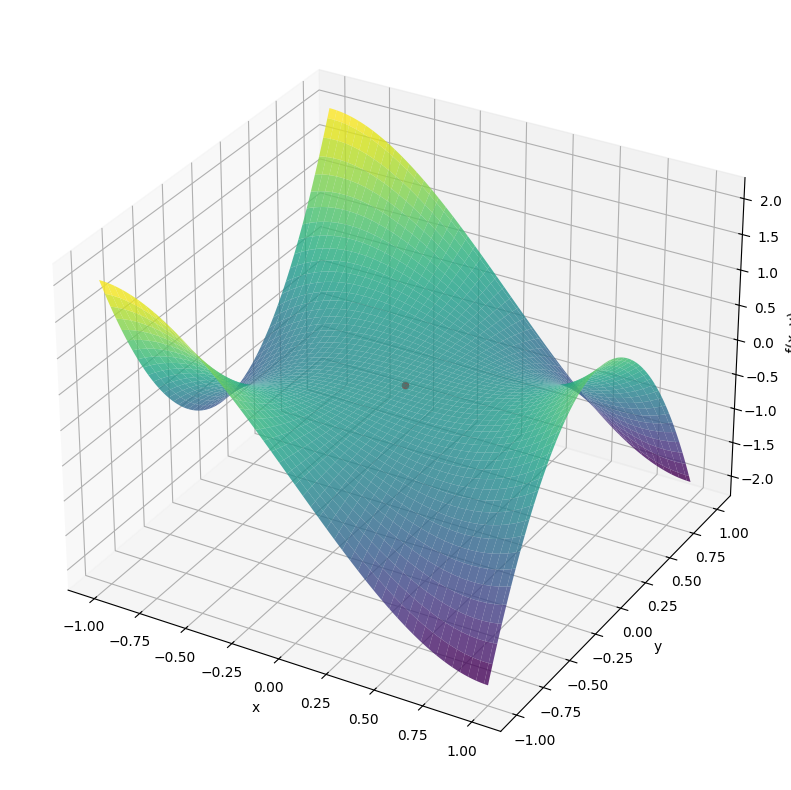

In [ ]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.scatter(0, 0, f(0, 0), color='red')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()

### Cost function 2

$f(x) = x^2 + y^2 - z^2 + x\cdot z - y\cdot z$

In [ ]:
x, y, z = sp.symbols('x y z')

cost_function = x**2 + y**2 + z**2 + (x**2)*z - (y**2)*z

In [ ]:
grad = gradient(cost_function, [x,y,z])
grad

Matrix([
[      2*x*z + 2*x],
[     -2*y*z + 2*y],
[x**2 - y**2 + 2*z]])

In [ ]:
critical_points = sp.solve(grad, [x, y, z])
print(critical_points)

[(0, 0, 0), (0, -sqrt(2), 1), (0, sqrt(2), 1), (-sqrt(2), 0, -1), (sqrt(2), 0, -1)]


In [ ]:
hess = hessian(cost_function, [x,y,z])
hess

Matrix([
[2*z + 2,       0,  2*x],
[      0, 2 - 2*z, -2*y],
[    2*x,    -2*y,    2]])

In [ ]:
for point in critical_points:
    hess_value = hess.subs({x: point[0], y: point[1], z: point[2]})
    eigvalues = hess_value.eigenvals()
    if all(val > 0 for val in eigvalues):
        print(f"Critical point at (x, y) = {point} is a local minimum.")
    elif all(val > 0 for val in eigvalues):
        print(f"Critical point at (x, y) = {point} is a local maximum.")
    else:
        print(f"Critical point at (x, y) = {point} is a saddle point (inconclusive test).")

Critical point at (x, y) = (0, 0, 0) is a local minimum.
Critical point at (x, y) = (0, -sqrt(2), 1) is a saddle point (inconclusive test).
Critical point at (x, y) = (0, sqrt(2), 1) is a saddle point (inconclusive test).
Critical point at (x, y) = (-sqrt(2), 0, -1) is a saddle point (inconclusive test).
Critical point at (x, y) = (sqrt(2), 0, -1) is a saddle point (inconclusive test).


# Conclusion

Symbolic algebra is cool to see for the first time, but it is not a feasible way to solve optimization problems. All the cost functions dealt in this tutorial were simple polynomials. SymPy kind of sucks at solving complicated functions and may output weird outputs involving imaginary numbers even when not needed. Additionally, functions involving high number of variables cannot be solved exactly and as such numerical methods are more preferred. Lastly, symbolic differentiation creates expression swell which too is undesired. All in all, symbolic algebra is not the way forward and we will have to adapt to other techniques.